In [13]:
import os
import pandas as pd
from scipy import stats
import numpy as np

from sklearn import impute

In [2]:
titanic_df = pd.read_csv('titanic.csv')

In [3]:
titanic_df.head()

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [5]:
## Total missing values in each column

titanic_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Deck            199
RoomNum         199
Side            199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
# Percent of values missing

titanic_df.isnull().mean() * 100

HomePlanet      2.312205
CryoSleep       2.496261
Deck            2.289198
RoomNum         2.289198
Side            2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64

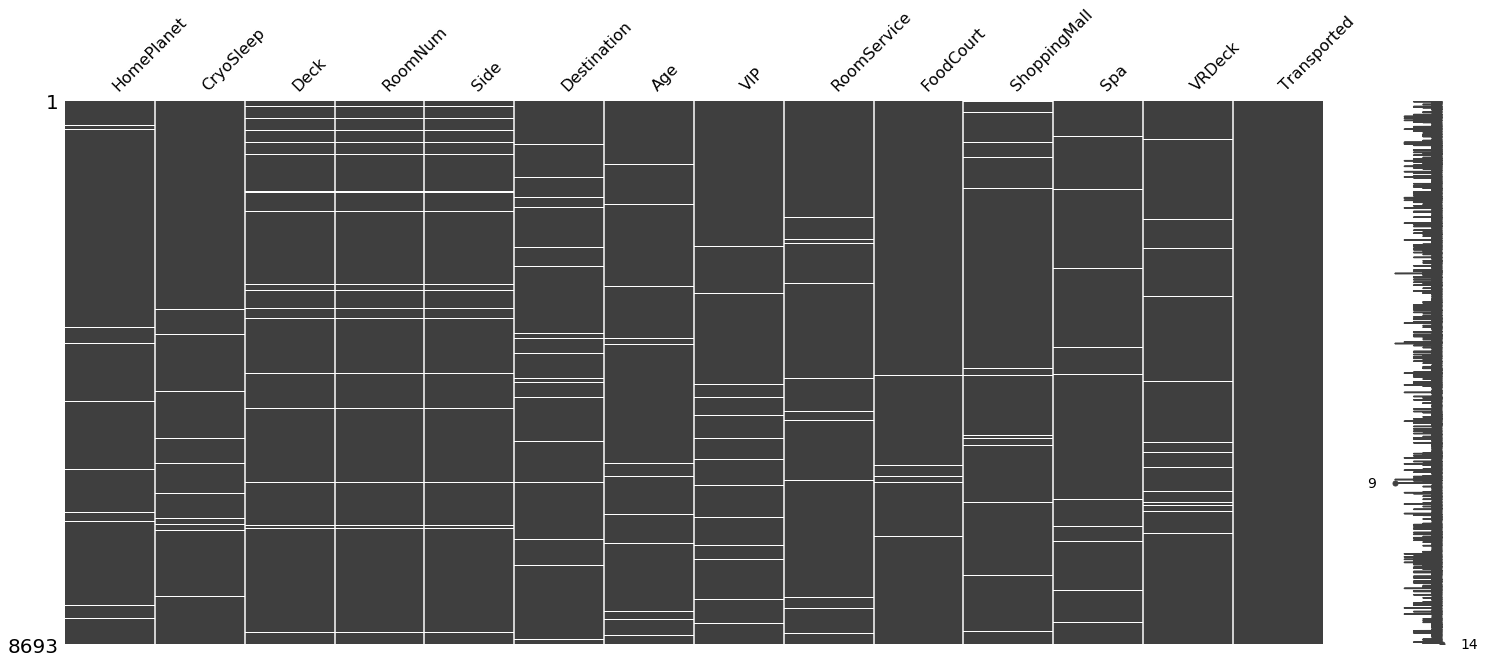

In [9]:
# Fun viz of where missing values exist in the dataframe

import missingno as msno
msno.matrix(titanic_df)

In [52]:
titanic_df.describe()

,RoomNum,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8494.000000,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,600.367671,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,511.867226,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167.250000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,427.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,999.000000,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,1894.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [38]:
# Impute int values with mean.

titanic_df_impute = titanic_df.copy()

mean_imputer = impute.SimpleImputer(strategy='mean')

titanic_df_impute['RoomNum'] = mean_imputer.fit_transform(titanic_df_impute['RoomNum'].values.reshape(-1,1))
titanic_df_impute['Age'] = mean_imputer.fit_transform(titanic_df_impute['Age'].values.reshape(-1,1))
titanic_df_impute['RoomService'] = mean_imputer.fit_transform(titanic_df_impute['RoomService'].values.reshape(-1,1))
titanic_df_impute['FoodCourt'] = mean_imputer.fit_transform(titanic_df_impute['FoodCourt'].values.reshape(-1,1))
titanic_df_impute['ShoppingMall'] = mean_imputer.fit_transform(titanic_df_impute['ShoppingMall'].values.reshape(-1,1))
titanic_df_impute['Spa'] = mean_imputer.fit_transform(titanic_df_impute['Spa'].values.reshape(-1,1))
titanic_df_impute['VRDeck'] = mean_imputer.fit_transform(titanic_df_impute['VRDeck'].values.reshape(-1,1))



In [39]:
titanic_df_impute.isnull().sum()

HomePlanet        0
CryoSleep       217
Deck            199
RoomNum           0
Side            199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [45]:
## Use ffil and fillna to fill object values with the value nearest to it

titanic_df_impute['HomePlanet'] = titanic_df_impute['HomePlanet'].fillna(method='ffill')
titanic_df_impute['CryoSleep'] = titanic_df_impute['CryoSleep'].fillna(method='ffill')
titanic_df_impute['Deck'] = titanic_df_impute['Deck'].fillna(method='ffill')
titanic_df_impute['Side'] = titanic_df_impute['Side'].fillna(method='ffill')
titanic_df_impute['VIP'] = titanic_df_impute['VIP'].fillna(method='ffill')
titanic_df_impute['Destination'] = titanic_df_impute['Destination'].fillna(method='ffill')

In [46]:
titanic_df_impute.isnull().sum()

HomePlanet      0
CryoSleep       0
Deck            0
RoomNum         0
Side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [47]:
titanic_df_impute

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,98.0,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,1499.0,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,1500.0,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,608.0,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


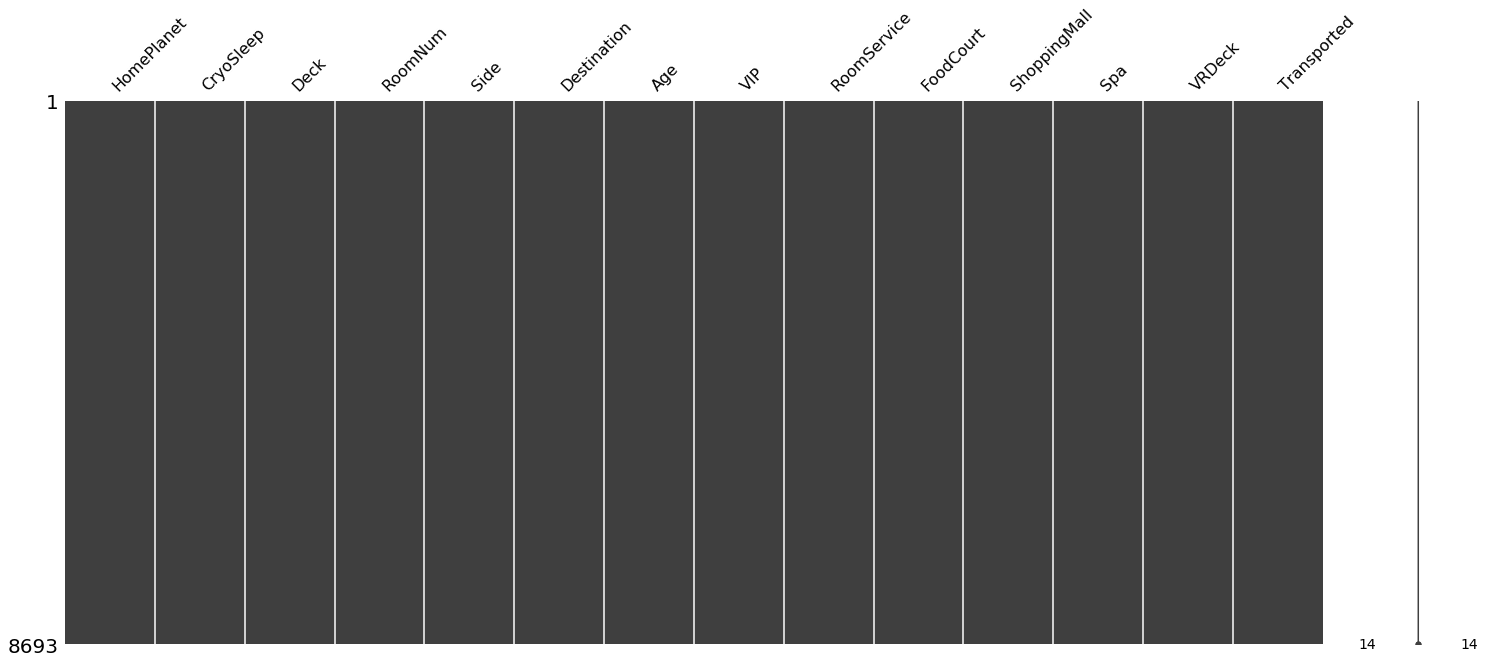

In [48]:
msno.matrix(titanic_df_impute)

In [53]:
titanic_df_impute.describe()

,RoomNum,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,600.367671,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,505.973797,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,173.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,448.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,983.000000,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,1894.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [51]:
titanic_df_impute.to_csv('spaceship-titanic_nonans')